# **Project Name**    - Myntra Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# Project Summary

Myntra, a prominent Indian fashion e-commerce company, is celebrated for its extensive range of clothing, accessories, and lifestyle products. Beyond its fashion expertise, Myntra manages a specialized division—Myntra Gifts Ltd.—which focuses on unique, all-occasion giftware. Headquartered in the UK, this division serves international markets through its online retail platform. The dataset analyzed covers transactions from December 1, 2009, to December 9, 2011, providing a detailed view of Myntra Gifts Ltd.’s online operations and customer purchasing trends. The goal of this project is to extract actionable insights to optimize sales, boost customer engagement, and enhance operational performance for the division.

Key insights reveal that sales peak on Mondays and Tuesdays between 10 AM and 1 PM, with weekdays consistently outperforming weekends. While sales follow predictable patterns, an afternoon dip in activity highlights a potential area for improvement. RFM analysis and clustering have identified distinct customer segments, facilitating the development of personalized marketing strategies. Low weekend sales and the afternoon slump suggest opportunities to increase engagement through targeted campaigns and strategic interventions.

These findings have significant implications for the e-commerce and retail industry. For Myntra Gifts Ltd., they offer pathways to refine sales strategies, enhance weekend performance, strengthen customer loyalty, and optimize inventory management. By implementing these insights, Myntra Gifts Ltd. can boost operational efficiency, elevate customer satisfaction, and achieve sustainable revenue growth. This project highlights the critical role of data-driven strategies in thriving within the competitive international giftware market.

# Business Context

Myntra is a leading Indian fashion e-commerce company known for its wide range of clothing, accessories, and lifestyle products. While Myntra is recognized primarily for fashion, this dataset relates to the company's online retail operations for Myntra Gifts Ltd., a UK-based division specializing in unique all-occasion giftware. This dataset spans transactions from December 1, 2009, to December 9, 2011, and includes detailed records of sales made through Myntra Gifts Ltd.’s non-store online platform. The dataset provides a thorough snapshot of the company's international online retail activities during this period.

# **GitHub Link -**

# **Problem Statement**


****

Myntra Gifts Ltd. aims to optimize its international online retail operations. Despite being a part of a leading fashion e-commerce brand, the division requires an in-depth analysis of its sales data to identify patterns, trends, and areas of improvement. The objective is to uncover insights into customer behavior, product performance, and market dynamics to enhance operational efficiency, boost revenue, and strengthen its position in the international giftware market.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















## ***1. Know Your Data***

### Import Libraries

In [34]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import math

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from yellowbrick.cluster import SilhouetteVisualizer
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [36]:
# Load Dataset
filepath = '/content/drive/MyDrive/Module_6_Capstone_Project/Online Retail.csv'
retail_data = pd.read_csv(filepath)

#making a copy of the original dataset
df = retail_data.copy()

### Dataset First View

In [37]:
# Displaying the first few rows to understand the structure of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [38]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [39]:
# Dataset Info
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/10 8:26       2.55     17850.0  United Kingdom  
1        12/1/10 8:26       3.39     17850.0  United Kingdom  
2        12/1/10 8:26       2.75     17850.0  United Kingdom  
3        12/1/10 8:26       3.39     17850.0  United Kingdom  
4        12/1/10 8:26       3.39     17850.0  United Kingdom  
...               ...        ...         ...             ...  
541904  12/9/11 12:50       0.85     12680.0          France  
541905  12/9/11 12:50       2.10     12680.0          France  
541906  12/9/11 12:50       4.15     12680.0          France  
541907  12/9/11 12:50       4.15     12680.0          France  
541908  12/9/11 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]>

#### Duplicate Values

In [40]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])


5268

#### Missing Values/Null Values

In [41]:
# Checking Missing Values/Null Values Count
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


<Axes: >

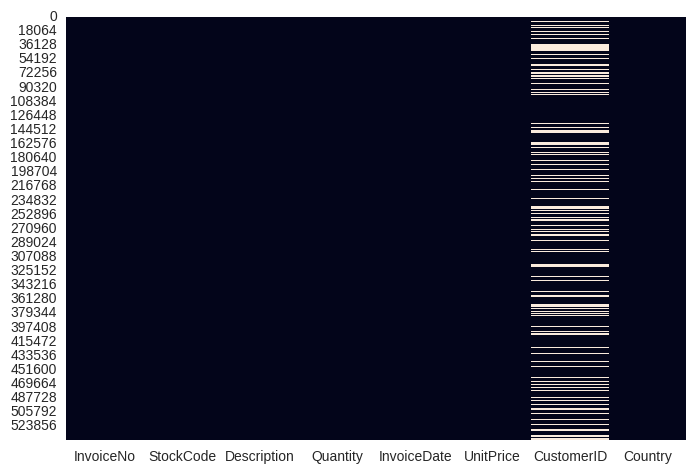

In [42]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [43]:
#The CustomerID column had 135,080 missing entries, which were removed. Other missing data (e.g., product descriptions) does not impact customer segmentation and was ignored.
#Dropping rows with missing CustomerID since clustering requires this information
df.dropna(subset=['CustomerID'],inplace=True)


### What did you know about your dataset?

The above dataset has 5,41,909 rows and 8 columns. There are 5268 duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [44]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [45]:
# Dataset Describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

InvoiceNo: Invoice number.Each transaction is identified by a unique 6-digit Invoice Number. **Assuming if this number begins with the letter 'c', it signifies a canceled transaction.

StockCode: Product (item) code.A 5-digit Stock Code uniquely identifies each product.

Description: Product (item) name.The Description field provides the name of the product.

Quantity: The Quantity field indicates the number of units of each product included in a transaction.

InvoiceDate: Invoice Date and time. The Invoice Date and time record when the transaction was created.

UnitPrice: Unit price. The Unit Price represents the cost of each individual product.

CustomerID: A Customer ID is assigned to each unique customer

Country: Country name. The Country field specifies the customer's country of residence.

### Check Unique Values for each variable.

In [46]:
# Check Unique Values for each variable.
for i in df.columns:
  print(i,':' ,df[i].nunique())

InvoiceNo : 22190
StockCode : 3684
Description : 3896
Quantity : 436
InvoiceDate : 20460
UnitPrice : 620
CustomerID : 4372
Country : 37


## 3. ***Data Wrangling***

### Feature Engineering & Data Pre-processing

In [47]:
# Adding a new feature: TotalPurchaseAmount (Quantity * UnitPrice)
df['TotalPurchaseAmount'] = df['Quantity'] * df['UnitPrice']


# Converting InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# #Creating a set of new features from Invoicedates
df['Month'] = df['InvoiceDate'].dt.month_name() #Month when invoice was generated
df['Day'] = df['InvoiceDate'].dt.day_name() #Day when invoice was generated
df['Hour'] = df['InvoiceDate'].dt.hour #Hour of the day when invoice was generated
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchaseAmount,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8


In [48]:
#Converting invoice number to perform a search for cancelled orders
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
cancellations = df[df['InvoiceNo'].str.contains('C')]
cancellations.shape

(8905, 12)

In [49]:
# Dropping cancellations from the main dataframe
df = df[~df['InvoiceNo'].str.contains('C')]

There are  8905 cancelled orders

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [50]:
monthly_sales = df.groupby('Month')['Quantity'].sum()
daily_sales = df.groupby('Day')['Quantity'].sum()
daily_sales

,Quantity
Day,
Friday,823429
Monday,769009
Sunday,466474
Thursday,1152450
Tuesday,1007871
Wednesday,962463


In [51]:
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df


,Count,count
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


#### Chart - 1
Analysis of sales based on Seasonality

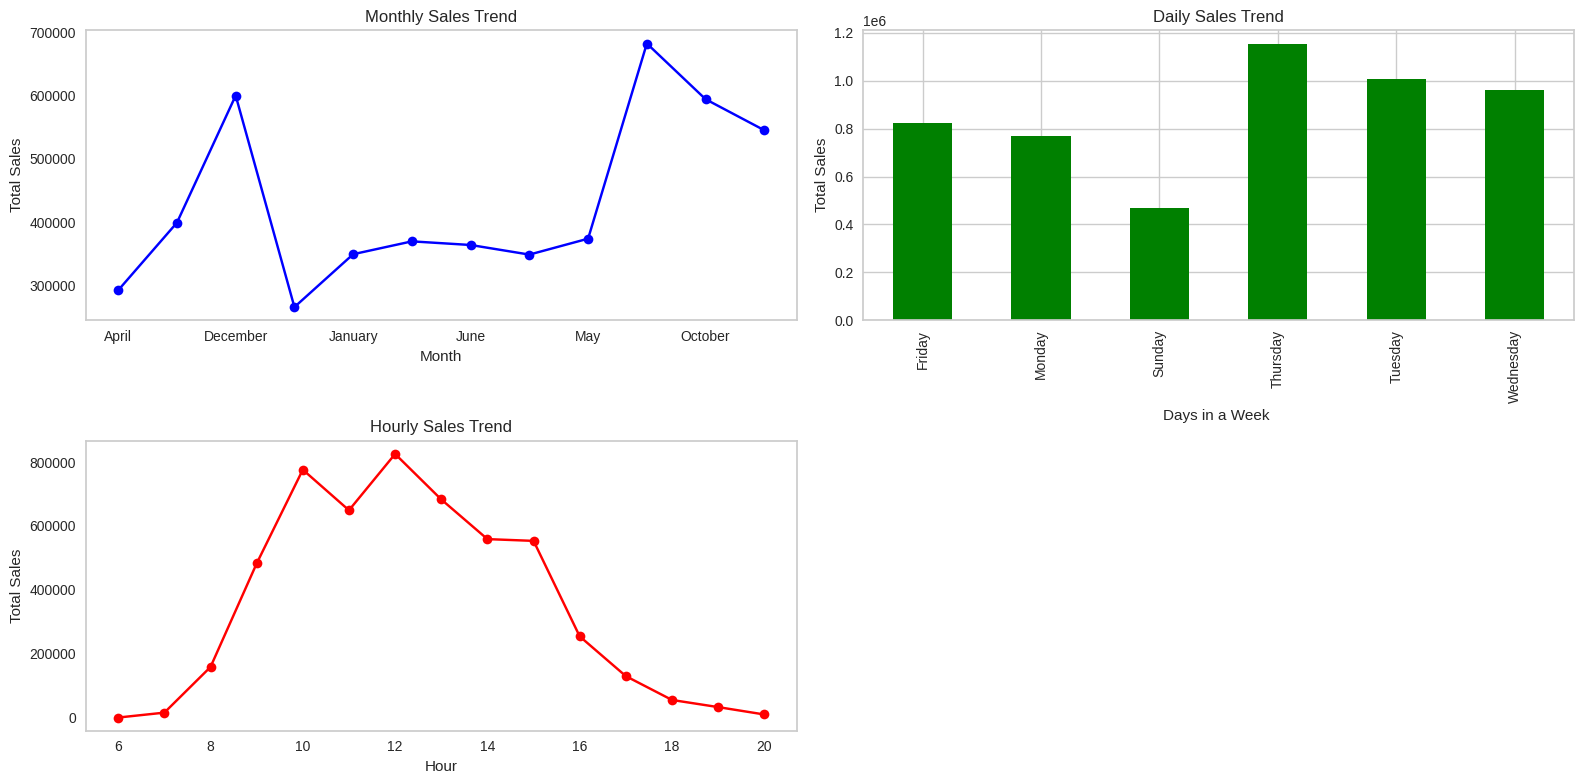

In [52]:
monthly_sales = df.groupby('Month')['Quantity'].sum()
daily_sales = df.groupby('Day')['Quantity'].sum()
hourly_sales = df.groupby('Hour')['Quantity'].sum()

# Plot temporal sales trends
plt.figure(figsize=(16, 8))

# Monthly sales trend
plt.subplot(2, 2, 1)
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()

# Daily sales trend
plt.subplot(2, 2, 2)
daily_sales.plot(kind='bar', color='green')
plt.title('Daily Sales Trend')
plt.xlabel('Days in a Week ')
plt.ylabel('Total Sales')

# Hourly sales trend
plt.subplot(2, 2, 3)
hourly_sales.plot(kind='line', marker='o', color='red')
plt.title('Hourly Sales Trend')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.grid()

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Monthly Sales Trend: A line chart is a good choice because it can show the trend of sales over time. The x-axis represents the months, and the y-axis represents the sales volume. This show how sales have changed over time.

Daily Sales Trend: A bar chart is a good choice because it shows the variation in sales volume for each day of the week. The x-axis represents the days of the week, and the y-axis represents the sales volume. The bars show how sales vary from day to day.

Hourly Sales Trend: A line chart is a good choice because shows the trend of sales over time. The x-axis represents the hours of the day, and the y-axis represents the sales volume.

##### 2. What is/are the insight(s) found from the chart?

-> Months with higher sales may coincide with holiday seasons (e.g., November and December for Christmas). These periods are critical for stocking inventory and running promotions.

-> Low-sales days present opportunities for targeted campaigns to improve customer activity (e.g., "Flash Sales").

-> Peak hours should align with operational readiness (e.g., customer support)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Inadequate operational readiness during peak hours can result in poor customer experience, increased customer churn, and negative reviews, all of which can significantly impact brand reputation and future sales.

#### Chart - 2

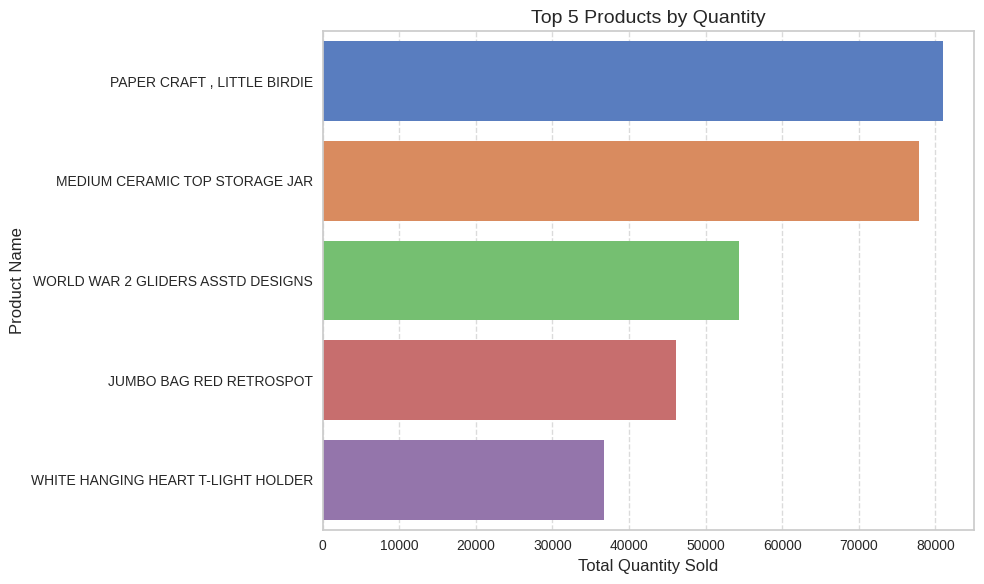

In [53]:

# Group by product description and sum the quantity sold
top_products_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5).reset_index()

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Quantity',
    y='Description',
    data=top_products_qty,
    palette='muted'  # Auto assigns different colors
)
plt.title('Top 5 Products by Quantity', fontsize=14)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




Why did you pick the specific chart?
A bar chart  effectively displays categorical data, allowing for easy comparison of quantities across different product descriptions.

What is/are the insight(s) found from the chart?
The chart highlights that the product "PAPER CRAFT, LITTLE BIRDIE" has the highest quantity (80,995), significantly outperforming others, while "WHITE HANGING HEART T-LIGHT HOLDER" has the lowest quantity (36,725) among the listed items.

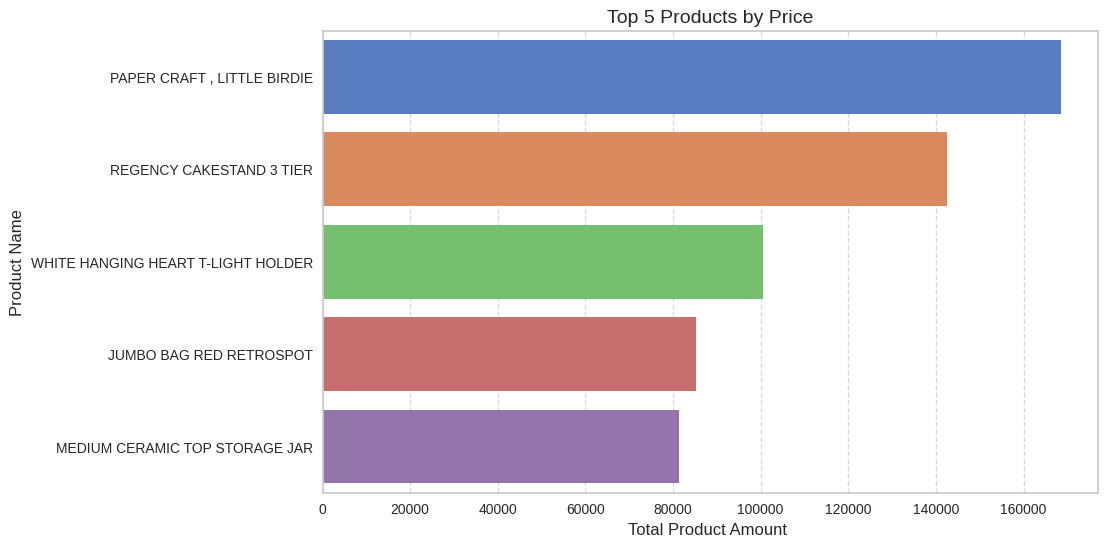

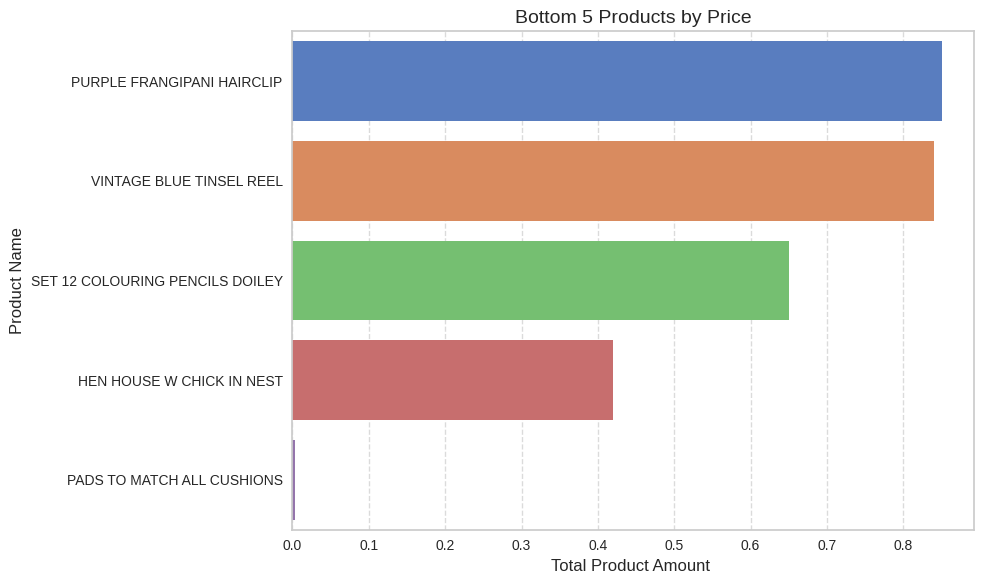

In [54]:
top_products_amt = df.groupby('Description')['TotalPurchaseAmount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
plt.subplot(1, 1, 1)
sns.barplot(
    x='TotalPurchaseAmount',
    y='Description',
    data=top_products_amt.head(5),
    palette='muted'  # Automatically assigns different colors
)
plt.title('Top 5 Products by Price', fontsize=14)
plt.xlabel('Total Product Amount ', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
#plt.tight_layout()
#plt.show()


plt.figure(figsize=(10, 6))
plt.subplot(1, 1, 1)
sns.barplot(
    x='TotalPurchaseAmount',
    y='Description',
    data=top_products_amt.tail(5),
    palette='muted'  # Automatically assigns different colors
)
plt.title('Bottom 5 Products by Price', fontsize=14)
plt.xlabel('Total Product Amount ', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Why did you pick the specific chart?
A bar chart was chosen because it is ideal for comparing total purchase amounts across different products, providing a clear visual representation of which items generated higher revenue.

What is/are the insight(s) found from the chart?
The product "PAPER CRAFT, LITTLE BIRDIE" generated the highest total purchase amount ($168,469.60) among the listed items.

Are there any insights that lead to negative growth? Justify with a specific reason.
The chart does not directly indicate negative growth, but the significantly lower total purchase amounts for "JUMBO BAG RED RETROSPOT" and "MEDIUM CERAMIC TOP STORAGE JAR" compared to the top items may suggest these products are underperforming. This could be due to lower demand, pricing issues, or inadequate marketing. Further analysis is needed to confirm.

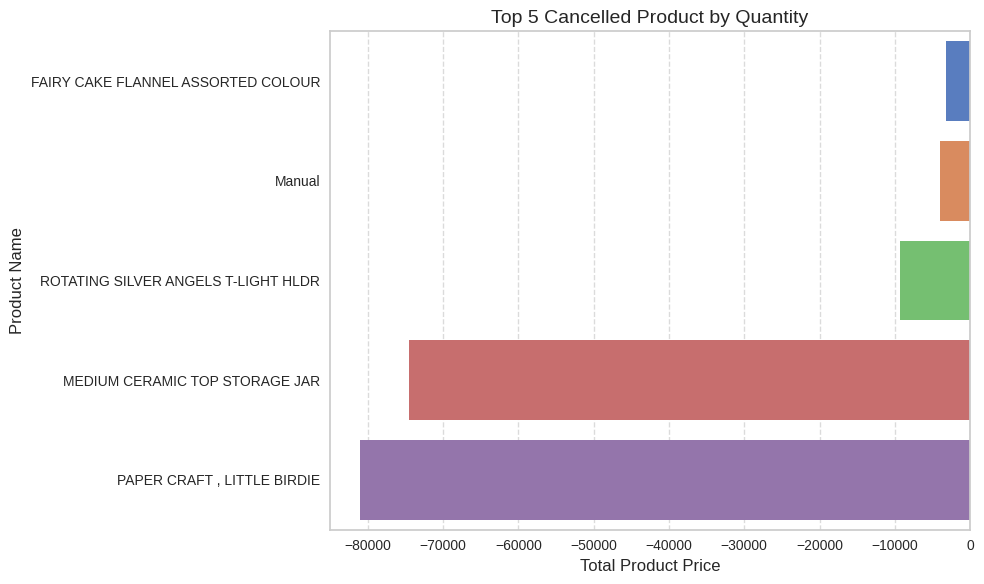

In [55]:
# Chart - 2 visualization code
most_cancelled_product = cancellations.groupby('Description')['Quantity'].sum().sort_values(ascending=False).tail(5).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Quantity',
    y='Description',
    data=most_cancelled_product,
    palette='muted'  # Automatically assigns different colors
)
plt.title('Top 5 Cancelled Product by Quantity', fontsize=14)
plt.xlabel('Total Product Price', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [56]:
most_cancelled_product.head(5)

,Description,Quantity
0,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3150
1,Manual,-3995
2,ROTATING SILVER ANGELS T-LIGHT HLDR,-9367
3,MEDIUM CERAMIC TOP STORAGE JAR,-74494
4,"PAPER CRAFT , LITTLE BIRDIE",-80995


#### Chart - 3

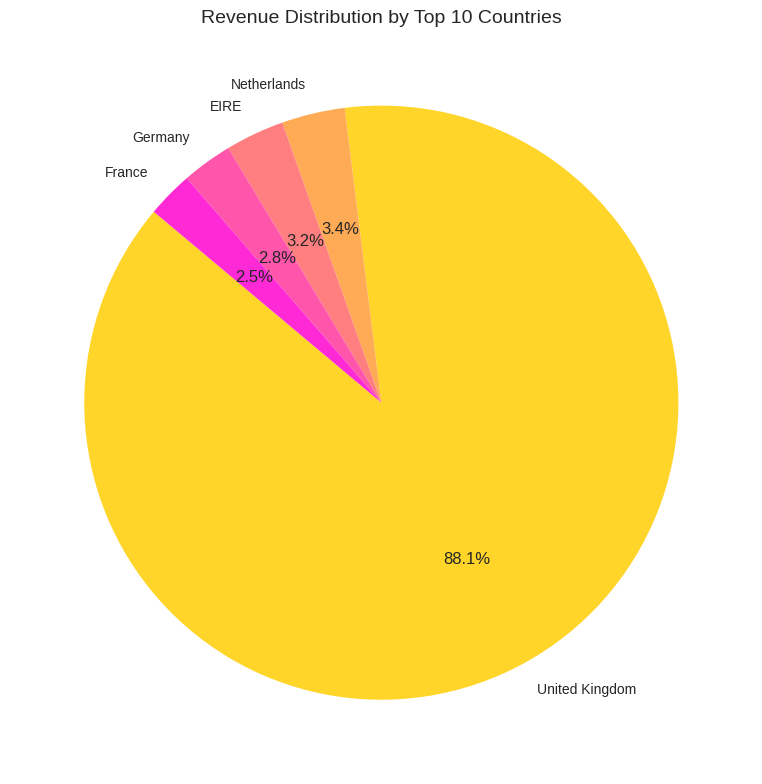

In [57]:
# Chart - 3 visualization code
country_revenue = df.groupby('Country')['TotalPurchaseAmount'].sum().sort_values(ascending=False).reset_index()

# Take the top 10 countries by revenue for better visualization
top_countries = country_revenue.head(5)

# --- Pie Chart ---
plt.figure(figsize=(8, 8))
plt.pie(
    top_countries['TotalPurchaseAmount'],
    labels=top_countries['Country'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('spring_r', len(top_countries))
)
plt.title('Revenue Distribution by Top 10 Countries', fontsize=14)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart effectively illustrates the proportional contribution of total purchase amounts from different countries, making it easy to see which country dominates the sales distribution

##### 2. What is/are the insight(s) found from the chart?

The United Kingdom overwhelmingly contributes the highest total purchase amount ($7,308,391.55), accounting for the majority of sales, while other countries like France and Germany contribute significantly less

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The relatively small proportions from countries like France &  Germany ($228,867.14) suggest potential underperformance in these markets. This could result from limited market penetration

#### Chart - 4

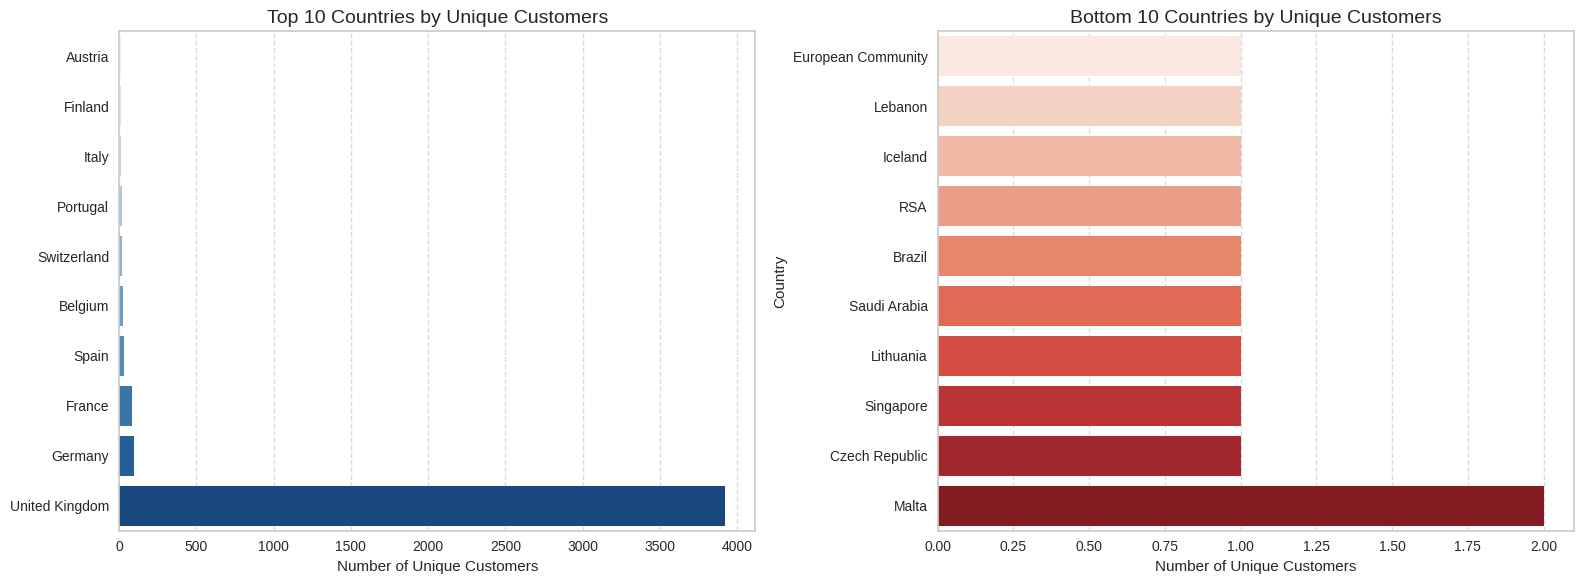

In [58]:


# Count unique customers for each country
unique_customers = df.groupby('Country')['CustomerID'].nunique().sort_values().reset_index()
unique_customers.columns = ['Country', 'UniqueCustomers']

# Get top 10 and bottom 10 countries
top_10_countries = unique_customers.tail(10)  # Top 10
bottom_10_countries = unique_customers.head(10)  # Bottom 10

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot top 10 countries
sns.barplot(
    x='UniqueCustomers',
    y='Country',
    data=top_10_countries,
    palette='Blues',
    ax=axes[0]
)
axes[0].set_title('Top 10 Countries by Unique Customers', fontsize=14)
axes[0].set_xlabel('Number of Unique Customers')
axes[0].set_ylabel('')  # Avoid duplicate ylabel
axes[0].grid(axis='x', linestyle='--', alpha=0.7)


# Plot bottom 10 countries
sns.barplot(
    x='UniqueCustomers',
    y='Country',
    data=bottom_10_countries,
    palette='Reds',
    ax=axes[1]
)
axes[1].set_title('Bottom 10 Countries by Unique Customers', fontsize=14)
axes[1].set_xlabel('Number of Unique Customers')
axes[1].set_ylabel('Country')
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing the number of unique customers across the top 10 and bottom 10 countries, clearly showing disparities in customer representation.

##### 2. What is/are the insight(s) found from the chart?

The United Kingdom has an overwhelmingly higher number of unique customers (3,921) compared to other countries, indicating it is the primary market. In contrast, countries like Malta and others in the bottom 10 have only 1-2 unique customers, showing minimal engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The extremely low number of unique customers in the bottom 10 countries suggests underperformance in these regions. This could indicate a lack of market presence, poor marketing strategies, or logistical challenges that hinder customer acquisition

#### Chart - 5

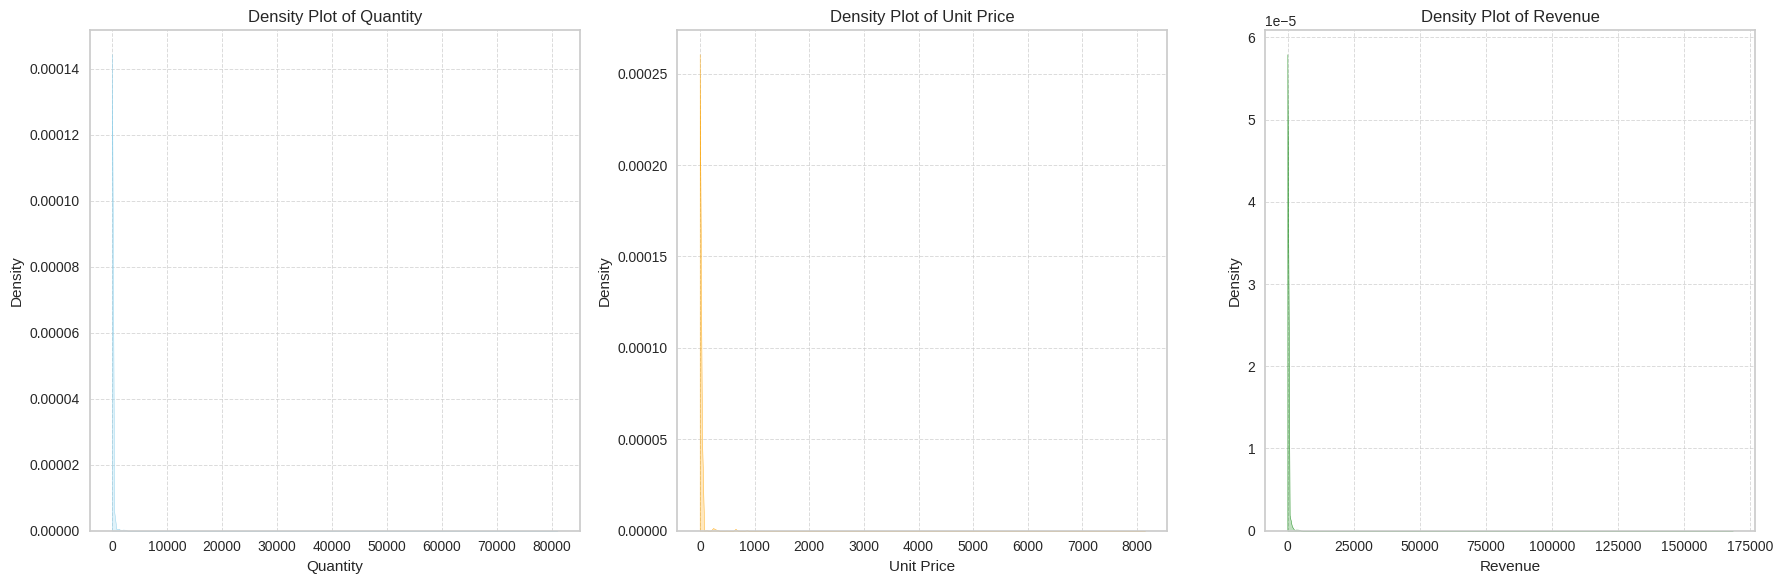

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.kdeplot(df['Quantity'], ax=axes[0], fill=True, color='skyblue')
axes[0].set_title('Density Plot of Quantity')
axes[0].set_xlabel('Quantity')
axes[0].grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

sns.kdeplot(df['UnitPrice'], ax=axes[1], fill=True, color='orange')
axes[1].set_title('Density Plot of Unit Price')
axes[1].set_xlabel('Unit Price')
axes[1].grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

sns.kdeplot(df['TotalPurchaseAmount'], ax=axes[2], fill=True, color='green')
axes[2].set_title('Density Plot of Revenue')
axes[2].set_xlabel('Revenue')
axes[2].grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.show()


##### What is/are the insight(s) found from the chart?

Quantity: Most transactions involve small quantities, with a long tail for higher quantities.
Unit Price: Many products are priced lower, but a few high-priced items create the skew.
Revenue: A majority of sales generate lower revenue, while a small number of transactions contribute disproportionately higher revenue.

Correlation Heatmap

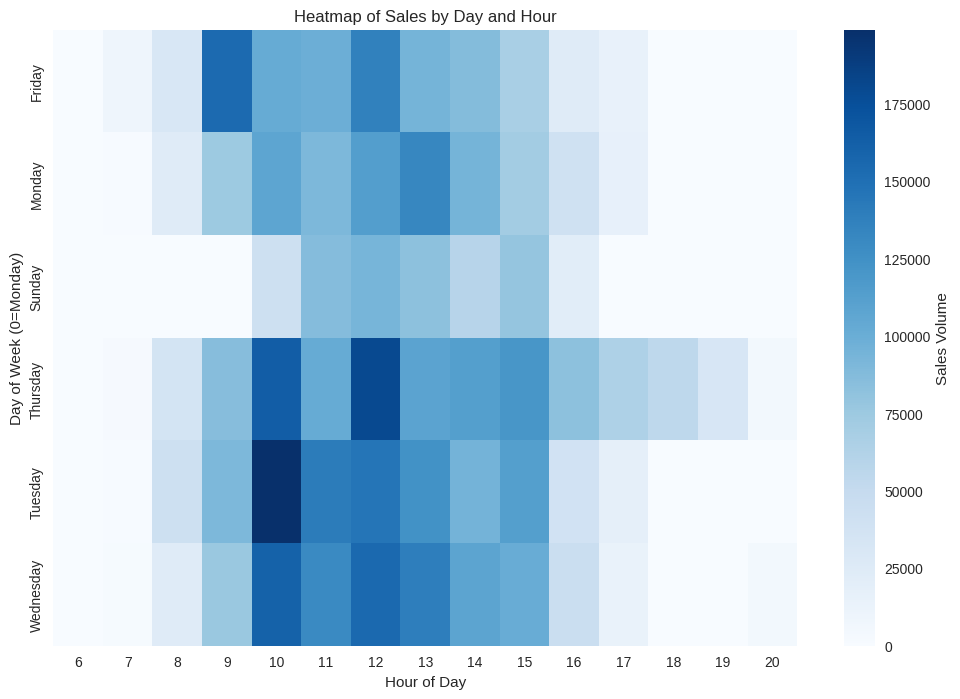

In [60]:
# Correlation Heatmap visualization code
# heatmap data: sales by day and hour
heatmap_data = df.groupby(['Day', 'Hour'])['Quantity'].sum().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=False, fmt='d', cbar_kws={'label': 'Sales Volume'})
plt.title('Heatmap of Sales by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Monday)')
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap is ideal for visualizing this scenaario because it allows us to easily identify patterns and trends in sales volume across both days of the week and hours of the day.

##### 2. What is/are the insight(s) found from the chart?

Peak Sales Times: The heatmap clearly shows that sales volume peaks on Mondays and Tuesdays between 10 AM and 1 PM. This suggests that these are the busiest times of the week for the business.
Weekday vs. Weekend: Sales are generally higher on weekdays compared to weekends.

Answer Here.

### Data Transformation

In [61]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchaseAmount,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,December,Friday,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,December,Friday,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,December,Friday,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,December,Friday,12


In [62]:
# Transform Your data
# Setting the day after the last transaction in your dataset
Latest_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# 3. Calculate Recency
# Calculate Recency
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_date - x.max()).days,
                                    'InvoiceNo': lambda x: len(x), 'TotalPurchaseAmount': lambda x: x.sum()})

# Renaming the columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency',
                    'TotalPurchaseAmount': 'Monetary'}, inplace=True)

# Display RFM DataFrame
print(rfm.head())

            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          19         73   1757.55
12350.0         310         17    334.40


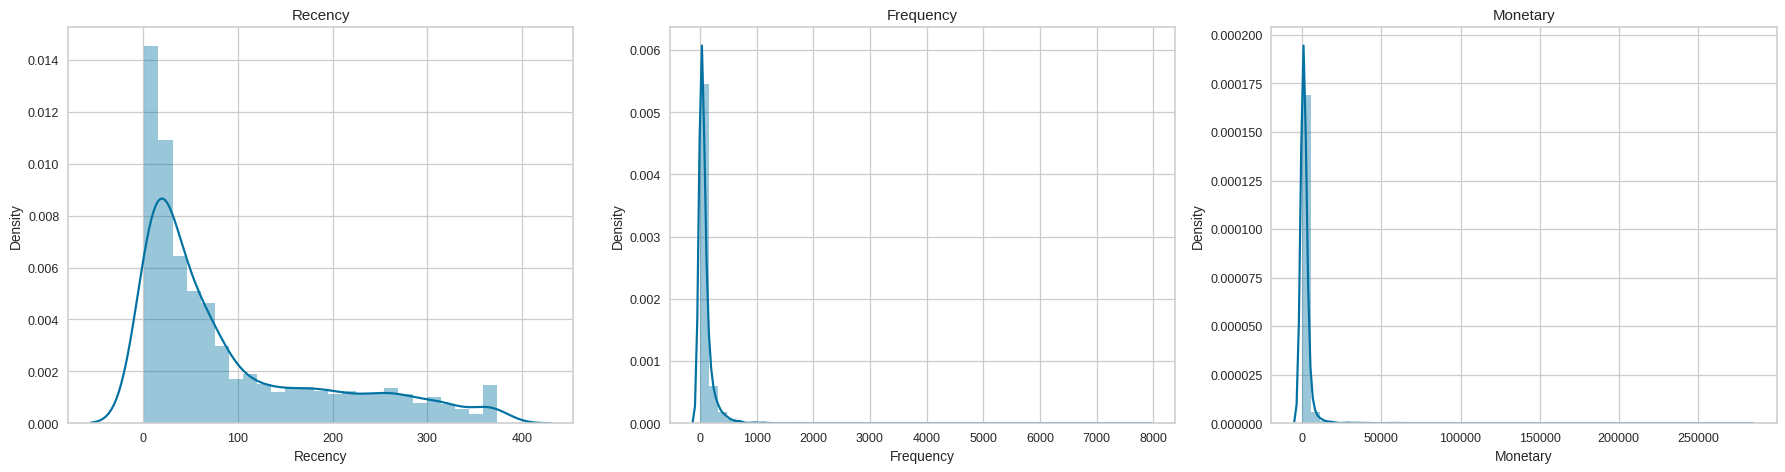

In [63]:
# plot the distribution of the RFM values


target = ['Recency', 'Frequency',	'Monetary']
plt.figure(figsize=(20,10), dpi=90)
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(rfm[col])
  plt.title(col.title())
  plt.tight_layout()

According to the histograms, we understand that Recency,Frequency and Monetary are all positively skewed distribution

In [64]:
# treat the negative and zero values to handle infinite numbers during log transformation
def handle_negative(num):
  if num <= 0:
    return 1
  else:
    return num

# Handling negative values for recency and monetary columns by applying the handle_negative function
rfm['Recency'] = [handle_negative(x) for x in rfm['Recency']]
rfm['Monetary'] = [handle_negative(x) for x in rfm['Monetary']]

# apply log transfomation to RFM values
log_df = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

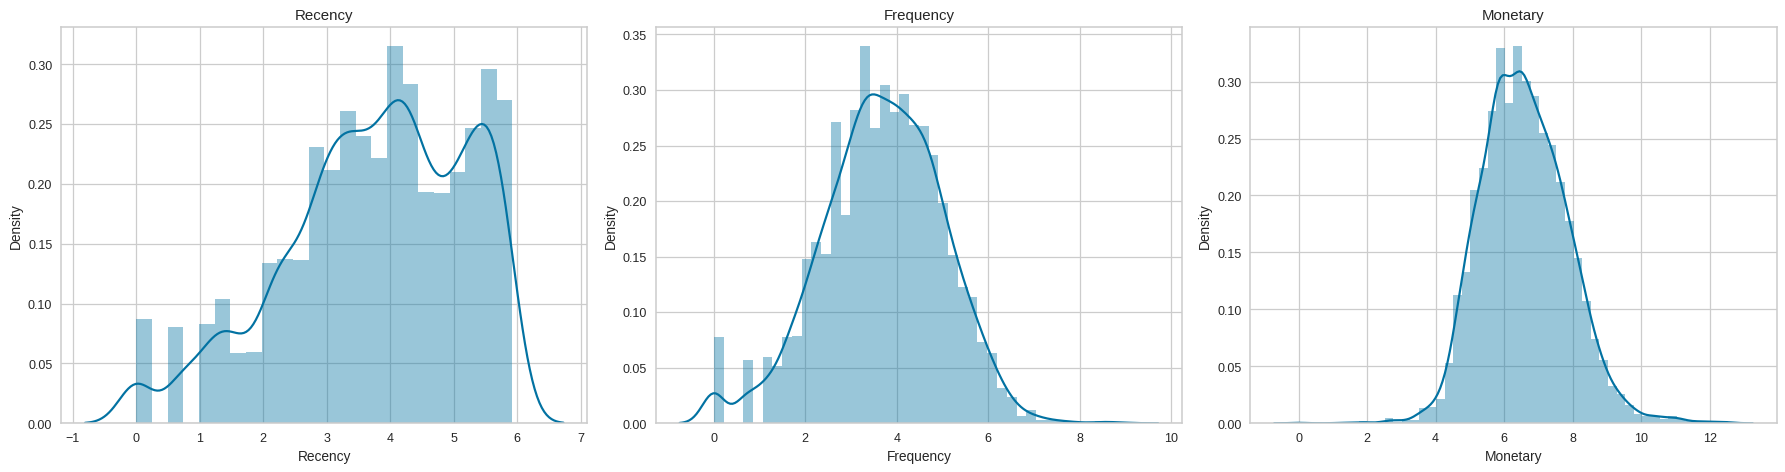

In [65]:
#Normalizing the data by applying Logarithmic tarnsformation

target = ['Recency', 'Frequency',	'Monetary']
plt.figure(figsize=(20,10), dpi=90)
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(log_df[col])
  plt.title(col.title())
  plt.tight_layout()

In [66]:
rfm['Recency_Log']   = rfm['Recency'].apply(math.log)
rfm['Frequency_Log'] = rfm['Frequency'].apply(math.log)
rfm['Monetary_Log']  = rfm['Monetary'].apply(math.log)
rfm.head()


,Recency,Frequency,Monetary,Recency_Log,Frequency_Log,Monetary_Log
CustomerID,,,,,,
12346.0,326,1,77183.60,5.786897,0.000000,11.253942
12347.0,2,182,4310.00,0.693147,5.204007,8.368693
12348.0,75,31,1797.24,4.317488,3.433987,7.494007
12349.0,19,73,1757.55,2.944439,4.290459,7.471676
12350.0,310,17,334.40,5.736572,2.833213,5.812338


# RFM Analysis The Traditional Way

RFM analysis is a marketing tool that helps businesses identify their most valuable customers. It does this by examining three key aspects of customer behavior:

Recency: How recently a customer made a purchase.
Frequency: How often they make purchases.
Monetary Value: The total amount of money they spend.
Each customer is assigned a score (usually 1 to 5) in each category, with higher scores indicating better performance.

By combining these scores, businesses can segment their customer base and prioritize those most likely to make future purchases or donations.

Highlighting the practical application of RFM analysis in identifying valuable customers.

In [67]:
#Creating a copy of our main dataframe for rfa analysis
rfm2 = rfm.copy()
# split the rfm values into four quantiles
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [68]:
# function to create R, F, M segments
def RScore(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScore(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [69]:
# calculate RFM segment values for each record
rfm2['R'] = rfm2['Recency'].apply(RScore, args=('Recency', quantiles, ))
rfm2['F'] = rfm2['Frequency'].apply(FnMScore, args=('Frequency', quantiles, ))
rfm2['M'] = rfm2['Monetary'].apply(FnMScore, args=('Monetary', quantiles, ))
rfm2.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_Log,Frequency_Log,Monetary_Log,R,F,M
0,12346.0,326,1,77183.60,5.786897,0.000000,11.253942,4,4,1
1,12347.0,2,182,4310.00,0.693147,5.204007,8.368693,1,1,1
2,12348.0,75,31,1797.24,4.317488,3.433987,7.494007,3,3,1
3,12349.0,19,73,1757.55,2.944439,4.290459,7.471676,2,2,1
4,12350.0,310,17,334.40,5.736572,2.833213,5.812338,4,4,3


In [70]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm2['RFMGroup'] = rfm2.R.map(str) + rfm2.F.map(str) + rfm2.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm2['RFMScore'] = rfm2[['R', 'F', 'M']].sum(axis = 1)
rfm2.head()

,Recency,Frequency,Monetary,Recency_Log,Frequency_Log,Monetary_Log,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,5.786897,0.000000,11.253942,4,4,1,441,9
12347.0,2,182,4310.00,0.693147,5.204007,8.368693,1,1,1,111,3
12348.0,75,31,1797.24,4.317488,3.433987,7.494007,3,3,1,331,7
12349.0,19,73,1757.55,2.944439,4.290459,7.471676,2,2,1,221,5
12350.0,310,17,334.40,5.736572,2.833213,5.812338,4,4,3,443,11


### Data Scaling

In [71]:
features = ['Recency_Log', 'Frequency_Log', 'Monetary_Log']

# scaling our datausing StandardScaler to bring all features to a similar scale.
X_features = rfm[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)

# Silhouette Analysis
Silhouette analysis helps us understand how well-separated our clusters are. It visually represents how similar each data point is to its own cluster compared to other clusters.

Silhouette score for 2 clusters: 0.395


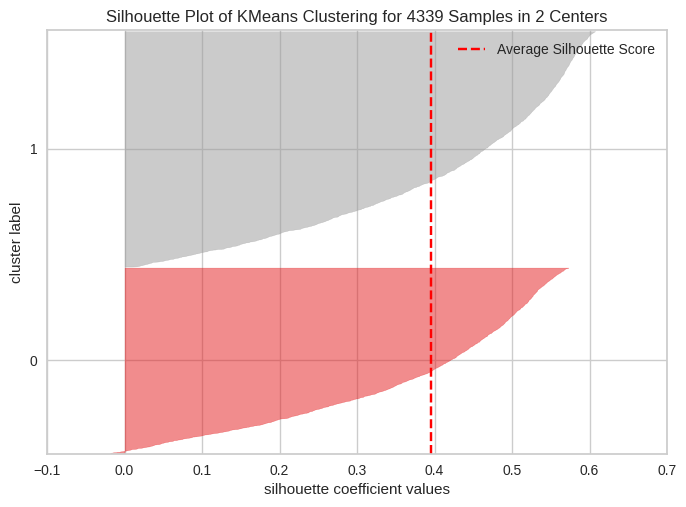

Silhouette score for 3 clusters: 0.303


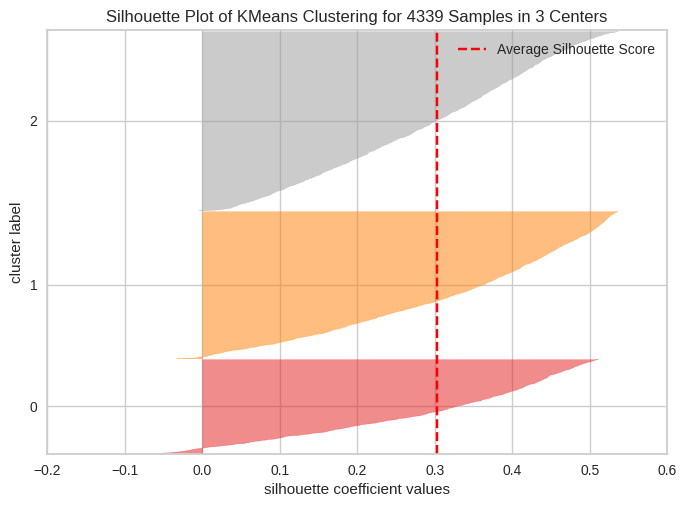

Silhouette score for 4 clusters: 0.299


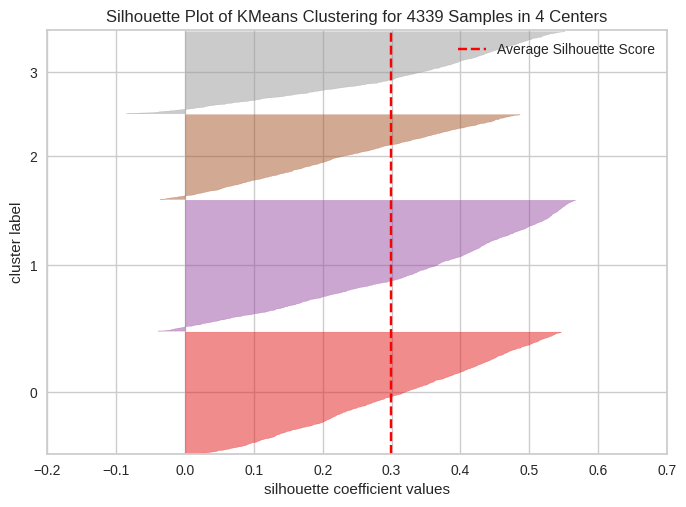

Silhouette score for 5 clusters: 0.279


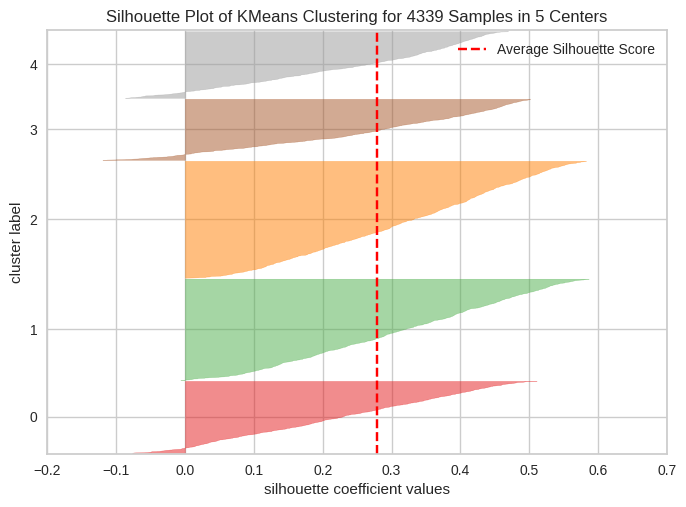

Silhouette score for 6 clusters: 0.276


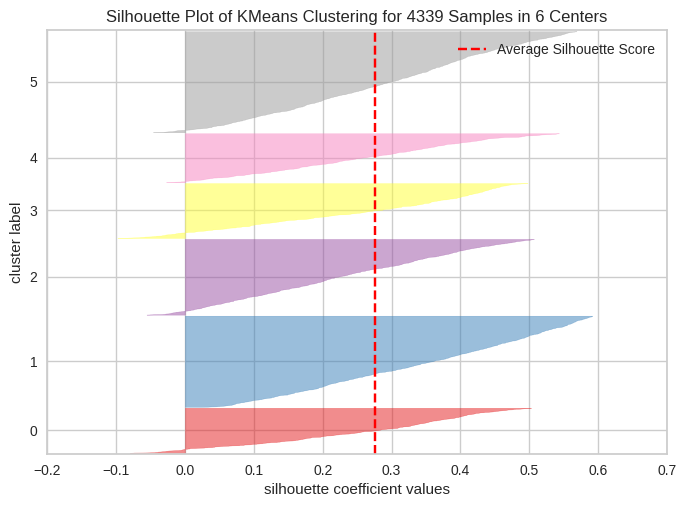

Silhouette score for 7 clusters: 0.263


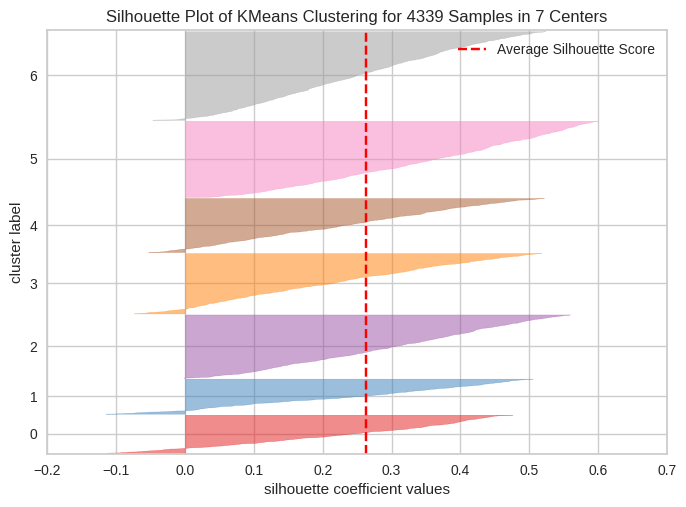

Silhouette score for 8 clusters: 0.260


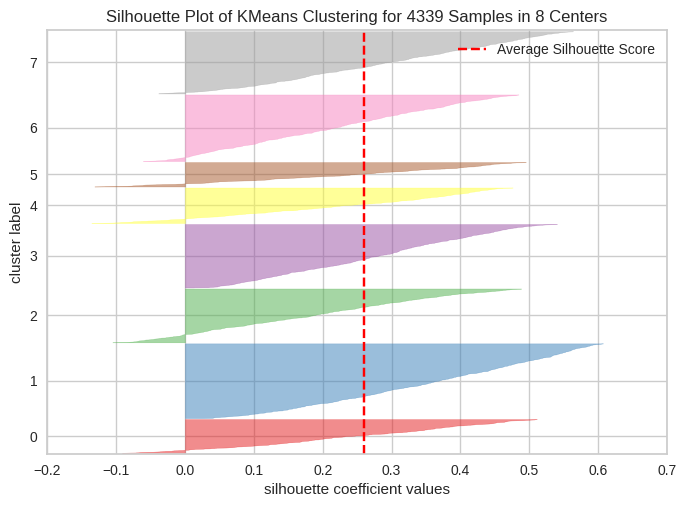

Silhouette score for 9 clusters: 0.254


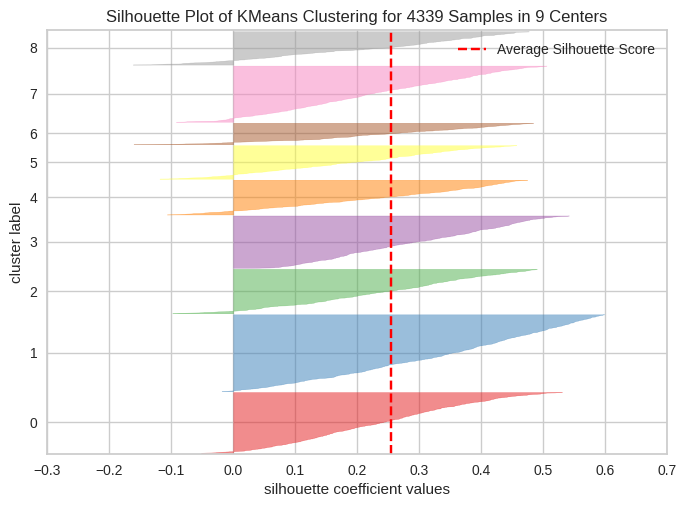

In [72]:
silhouette_scores = []

# Loop over different values of K
for n_clusters in range(2, 10):
  # Initialize the K-Means model with number of clusters
  kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters)

  # Fit the KMeans Model to the data
  kmeans.fit(X)

  # Predict the cluster labels for each data point
  labels = kmeans.labels_

  # Calculate the Silhouette score
  silhouette = silhouette_score(X, labels)

  # Append the silhouette_score to the array
  silhouette_scores.append(silhouette)

  # Print the silhouette score
  print(f'Silhouette score for {n_clusters} clusters: {silhouette:.3f}')

  visualizer = SilhouetteVisualizer(kmeans)

  visualizer.fit(X)
  visualizer.poof()


From the silhouette analysis, it is clearly understood that, 2 clusters are performing best. Hence, 2 clusters will be selected to build the KMeans model and classify the customers.

## ***7.1 ML Model Implementation***

# K-Mean Clustering

K-means clustering function is to group similar data points by iteratively assigning them to the closest cluster center (centroid) and then updating the centroid's position.

-However, K-means has some limitations:

-Initial centroid placement matters

-Struggles with irregularly shaped clusters

-Determining the optimal number of clusters is tricky


In [73]:
# KMeans with 2 clusters

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

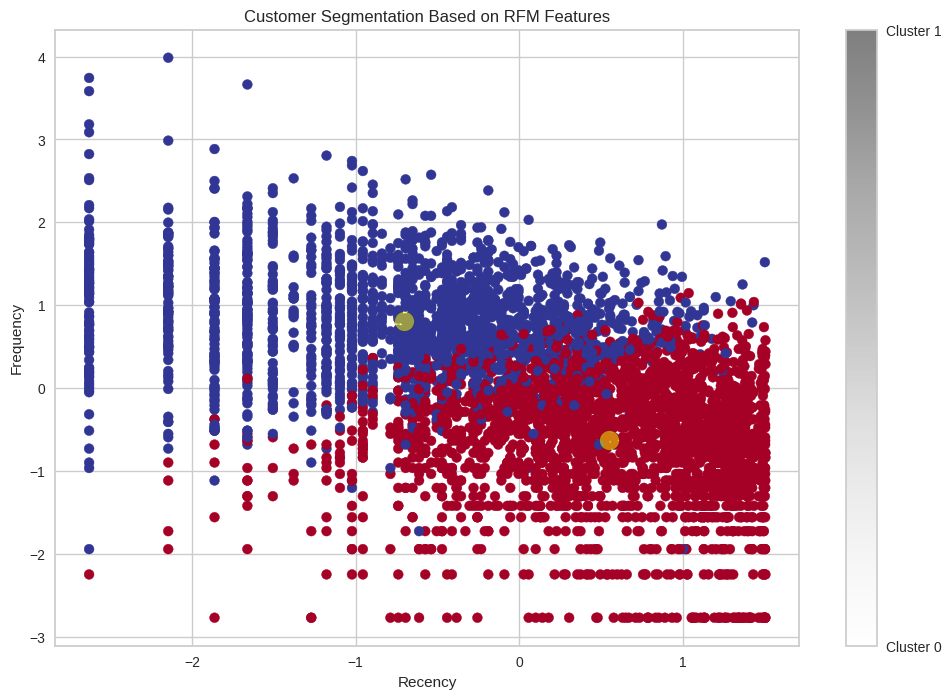

In [74]:
# Visualization of customer segmentation based On RFM features.
plt.figure(figsize=(12,8))
plt.title('Customer Segmentation Based on RFM Features')

# Plotting scatter plot using the first two features of the input data X and the predicted cluster labels y_kmeans
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

# Fetching cluster centers from the trained KMeans model and plot them as yellow circles with transparency
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5, edgecolor='black')


plt.xlabel('Recency') #setting x label
plt.ylabel('Frequency') #setting y label

# Adding a color bar to the plot to show the correspondence between the colors and the cluster labels
color_bar = plt.colorbar()
color_bar.set_ticks(np.unique(y_kmeans))
color_bar.set_ticklabels(['Cluster {}'.format(i) for i in np.unique(y_kmeans)])

plt.show()

**Applying Elbow Method on Recency, Frequency and Monetary**

The Elbow Method plot is commonly used to identify the optimal number of clusters in a K-means clustering algorithm.

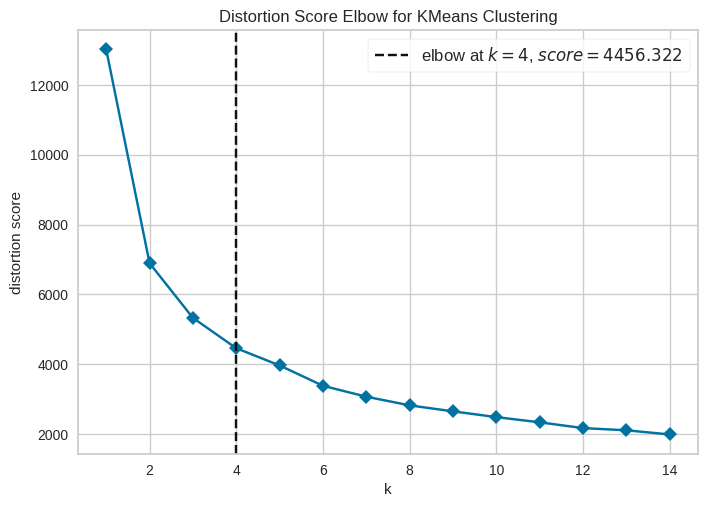

In [84]:
from yellowbrick.cluster import KElbowVisualizer
SSE = {}
for k in range(1,10):
  km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
  km = km.fit(X)
  SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.poof()
plt.show()


In [76]:

# Apply k-means with the chosen number of clusters (assuming k=4)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X)
kmean_eval = silhouette_score(X, cluster_labels)
# Add cluster labels to the dataframe
rfm['Cluster'] = cluster_labels
rfm


,Recency,Frequency,Monetary,Recency_Log,Frequency_Log,Monetary_Log,Cluster
CustomerID,,,,,,,
12346.0,326,1,77183.60,5.786897,0.000000,11.253942,2
12347.0,2,182,4310.00,0.693147,5.204007,8.368693,1
12348.0,75,31,1797.24,4.317488,3.433987,7.494007,2
12349.0,19,73,1757.55,2.944439,4.290459,7.471676,2
12350.0,310,17,334.40,5.736572,2.833213,5.812338,3
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,5.627621,2.302585,5.196285,3
18281.0,181,7,80.82,5.198497,1.945910,4.392224,3
18282.0,8,12,178.05,2.079442,2.484907,5.182064,0


In [77]:
cluster_summary = rfm.groupby('Cluster').mean()
print(cluster_summary)


            Recency   Frequency     Monetary  Recency_Log  Frequency_Log  \
Cluster                                                                    
0         19.929952   37.979469   590.684614     2.692148       3.388490   
1         12.112426  284.884024  7156.905172     2.031642       5.293312   
2         94.081664   81.372111  1517.746096     4.282772       4.199892   
3        184.635965   14.714181   295.835337     5.000969       2.363749   

         Monetary_Log  
Cluster                
0            6.143358  
1            8.222583  
2            7.037354  
3            5.425106  


In [78]:
cluster_sizes = rfm['Cluster'].value_counts()
print(cluster_sizes)

Cluster
3    1368
2    1298
1     845
0     828
Name: count, dtype: int64


Cluster 0: Moderately Engaged Customers
Moderate Recency, Moderate Frequency, Low Monetary Value
Customers in this cluster have purchased somewhat recently (19.93 days ago on average) and buy moderately often (37.98 times).
Their spending (Monetary = $590.68) is relatively low.

Cluster 1: Loyal High-Value Customers
Low Recency, High Frequency, High Monetary Value
These are the most loyal and profitable customers. They purchase very frequently (284.88 times on average), spend the most ($7156.91), and buy very recently (12.11 days ago).

Cluster 2: Frequent Buyers with Potential
Moderate Recency, High Frequency, Moderate Monetary Value
These customers are moderately recent (94.08 days), purchase frequently (81.37 times), and have a medium monetary value ($1517.75).

Cluster 3: At-Risk or Dormant Customers
High Recency, Low Frequency, Low Monetary Value
These customers have not bought in a long time (184.63 days ago on average), purchase infrequently (14.71 times), and have the lowest spending ($295.83).







## ***7.2 ML Model Implementation***

### Hierarchical Clustering

Hierarchical clustering is another common method for grouping similar data points. Unlike K-means, where you need to specify the number of clusters in advance, hierarchical clustering builds a tree-like structure of clusters.

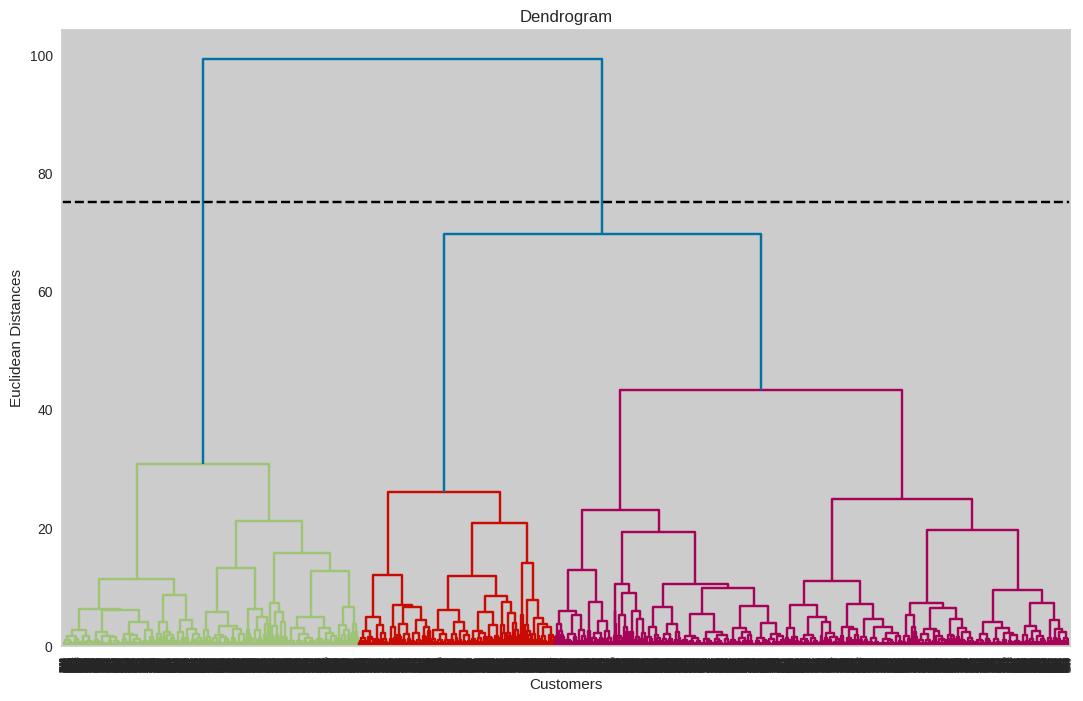

In [79]:
# ML Model Implementation
# Using the Dendogram to Decide the number of clusters
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=75, color='black', linestyle='--')
plt.show()

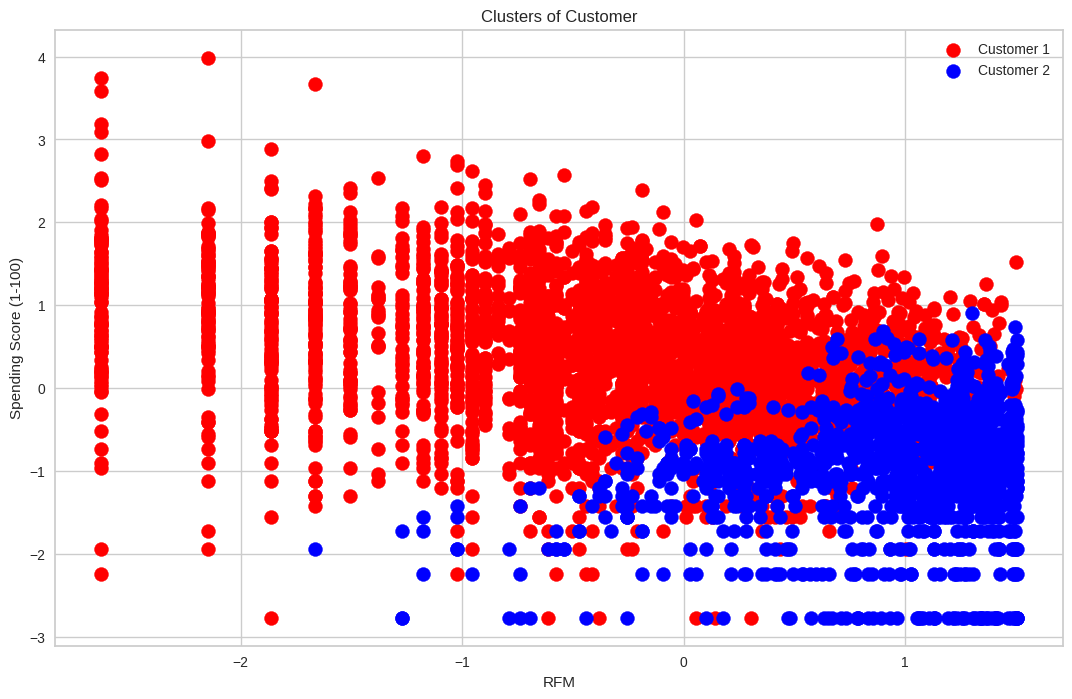

In [80]:
from sklearn.cluster import AgglomerativeClustering
hc =  AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')

y_hc = hc.fit_predict(X)

plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [81]:
silhouette = silhouette_score(X, y_hc)
silhouette

0.3277469958953039

# Summary Table including all the metrics

In [82]:
# Import necessary libraries
from prettytable import PrettyTable

# Initialize the table with specified column names
myTable = PrettyTable(['SL No.', "Model_Name", 'Data', "Optimal_Number_of_cluster","Evaluation Metric(Silhouette Score)"])

# Add rows to the table
myTable.add_row(['1', "K-Means with silhouette_score", "RFM", "2","0.395"])
myTable.add_row(['2', "K-Means with Elbow method", "RFM", "4","0.299"])
myTable.add_row(['3', "Hierarchical clustering", "RFM", "2","0.327"])

print(myTable)

+--------+-------------------------------+------+---------------------------+-------------------------------------+
| SL No. |           Model_Name          | Data | Optimal_Number_of_cluster | Evaluation Metric(Silhouette Score) |
+--------+-------------------------------+------+---------------------------+-------------------------------------+
|   1    | K-Means with silhouette_score | RFM  |             2             |                0.395                |
|   2    |   K-Means with Elbow method   | RFM  |             4             |                0.299                |
|   3    |    Hierarchical clustering    | RFM  |             2             |                0.327                |
+--------+-------------------------------+------+---------------------------+-------------------------------------+


# Industry Application


1.   RFM analysis and customer segmentation (via clustering) help identify high-value customers. This enables personalized marketing efforts, fostering customer loyalty

2.   Improved Product and Inventory Strategy:Segmentation and customer behavior insights can guide inventory management by identifying which products are more likely to appeal to specific customer segments, helping businesses plan inventory more efficiently and reduce overstock or stockouts.

3.   Operational Efficiency: Identifying periods of lower sales or dips in customer engagement allows companies to optimize their operational processes, ensuring smoother operations



# **Conclusion**



1. **Peak Sales Times:**  
   - Sales for Myntra Gifts Ltd. peak on Mondays and Tuesdays between 10 AM and 1 PM. These are critical periods to focus on operational readiness, ensuring adequate inventory, staff availability, and optimized online platform performance to cater to high customer demand.

2. **Weekday vs. Weekend Sales:**  
   - Weekday sales outperform weekends, highlighting an opportunity to improve weekend engagement. Strategies such as special promotions, gift bundle discounts, or themed campaigns tailored for weekend shoppers can help boost sales during these periods.

3. **Weekday Patterns:**  
   - Sales follow a consistent pattern on weekdays with peaks in the morning and evening but a noticeable dip in the afternoon. Addressing this dip with afternoon-exclusive offers or time-sensitive campaigns could help maintain steady sales throughout the day.

4. **Areas for Improvement (Negative Growth):**  
   - **Weekend Sales:** Lower engagement on weekends suggests an untapped market segment. Special campaigns like "Weekend Surprise Offers" or limited-time flash sales could be tested to attract more weekend customers.  
   - **Afternoon Slump:** The drop in weekday afternoon sales may point to reduced online traffic or unoptimized campaigns. Enhancing digital engagement during this period, such as through targeted social media ads or push notifications, could help counteract this trend.

5. **Customer Segmentation Insights:**  
   - RFM analysis and clustering have segmented customers into distinct groups based on their recency, frequency, and monetary value. These insights allow Myntra Gifts Ltd. to:
     - Prioritize high-value customers with loyalty programs and exclusive offers.
     - Re-engage dormant customers with tailored promotions or reminders.
     - Develop targeted marketing campaigns to attract new customers similar to high-value segments.

6. **Actionable Recommendations:**  
   - **Weekend Campaigns:** Implement promotional activities to boost sales on weekends, such as gift bundles, holiday-themed events, or free shipping offers.  
   - **Afternoon Engagement:** Introduce deals or content to drive traffic during the afternoon slump, such as “Lunch Break Deals” or gamified shopping experiences.  
   - **Customer-Centric Strategies:** Use clustering insights to tailor offerings and promotions for different customer segments, ensuring personalized experiences to enhance engagement and revenue.  
   - **Inventory Optimization:** Align stock levels with peak sales periods and high-demand customer segments to ensure availability and reduce losses due to overstock or stockouts.

By leveraging these insights, Myntra Gifts Ltd. can enhance its operational efficiency, improve customer satisfaction, and strengthen its competitive edge in the international giftware market.